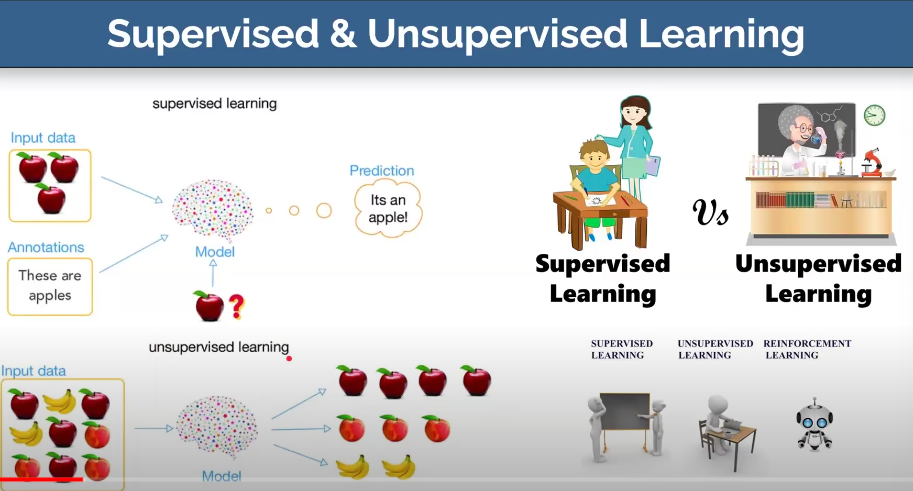

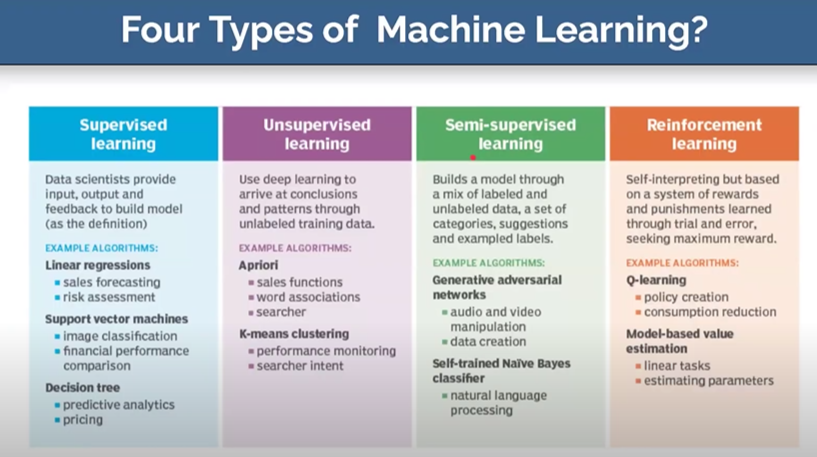

semi supervised, yarı denetimli demek. verilerin yarısı etiketlenmiş yarısı etiketlenmemiş.

reinforcement, pekiştirmeli öğrenme. bir ajan elinde veri yokken çevreyle etkileşime girip veri toplaya toplaya öğreniyor. otonom araç gibi

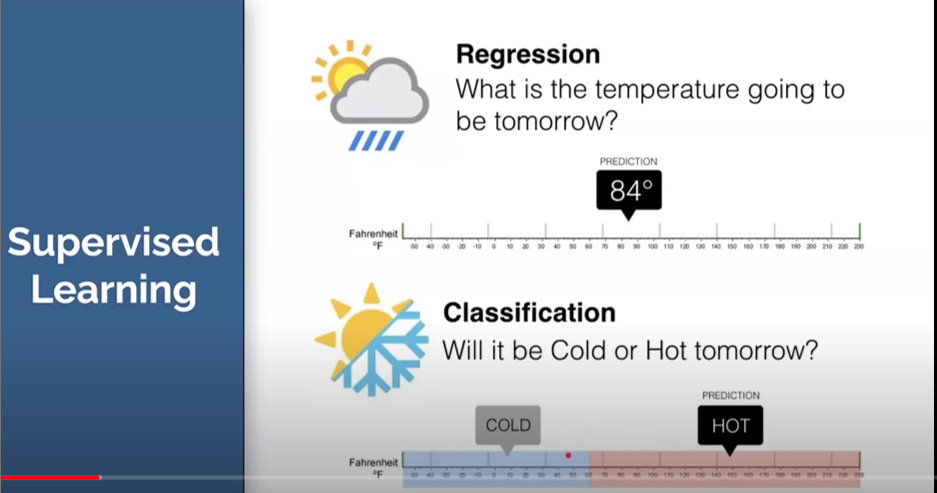

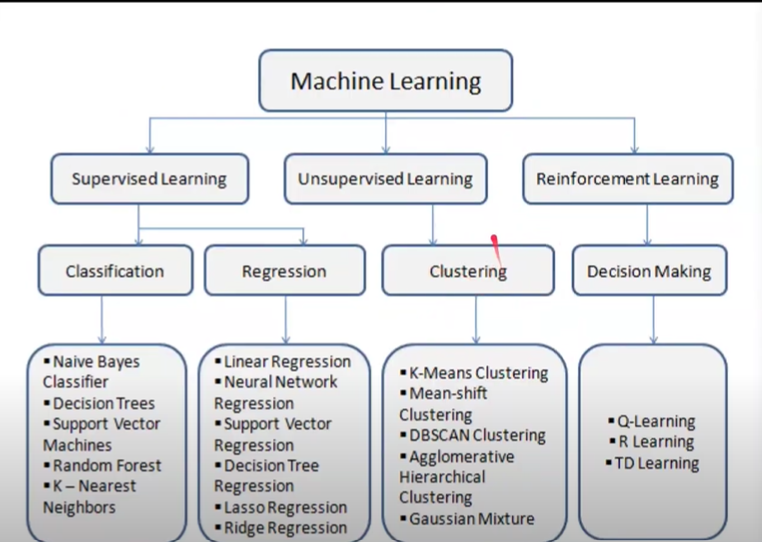

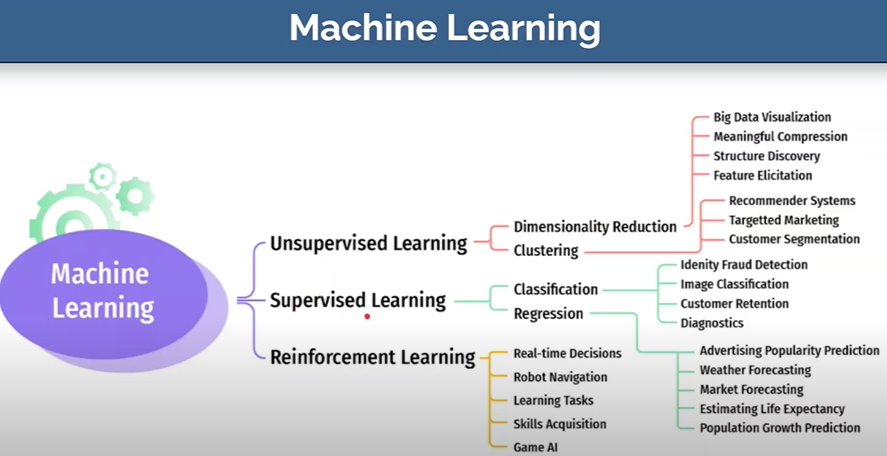

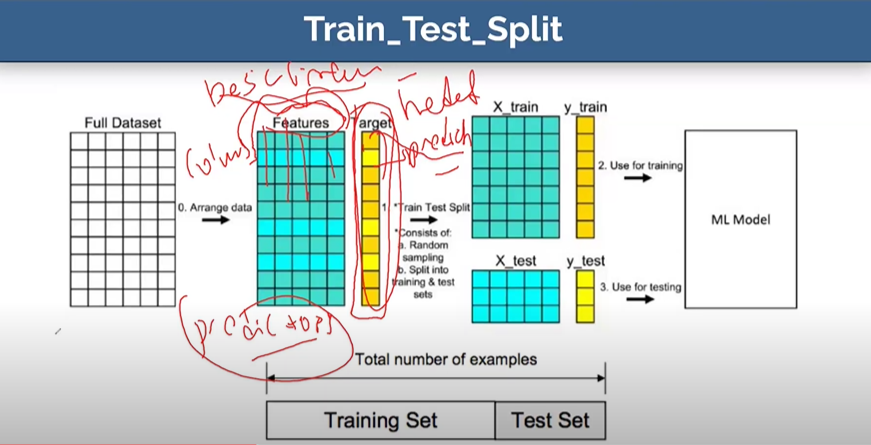

diğer isimleri
features:descriptors, columns, predictors
target:predicty

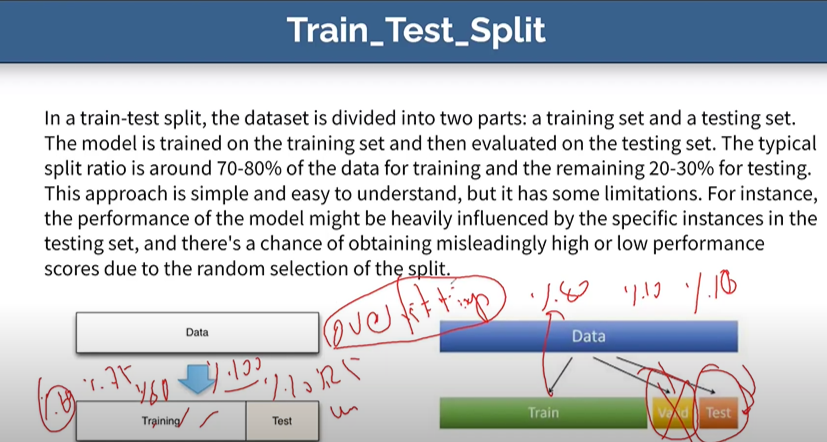

%80-%20 genelde
az veri varsa valid yapılmaz yapılacaksa %80-%10-%10

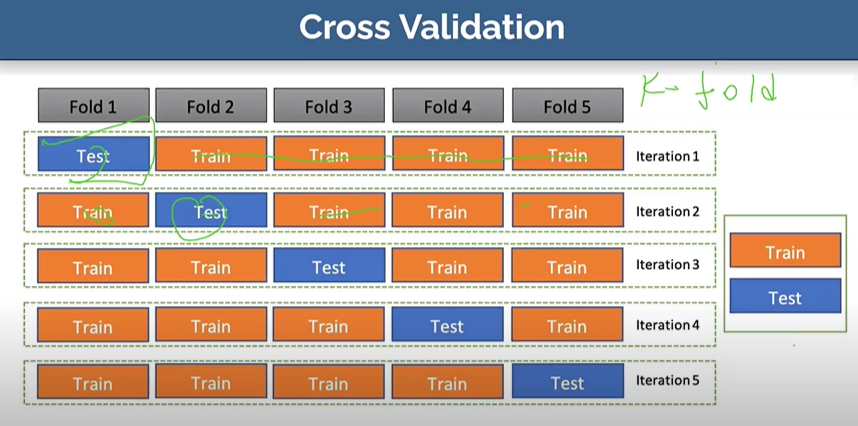

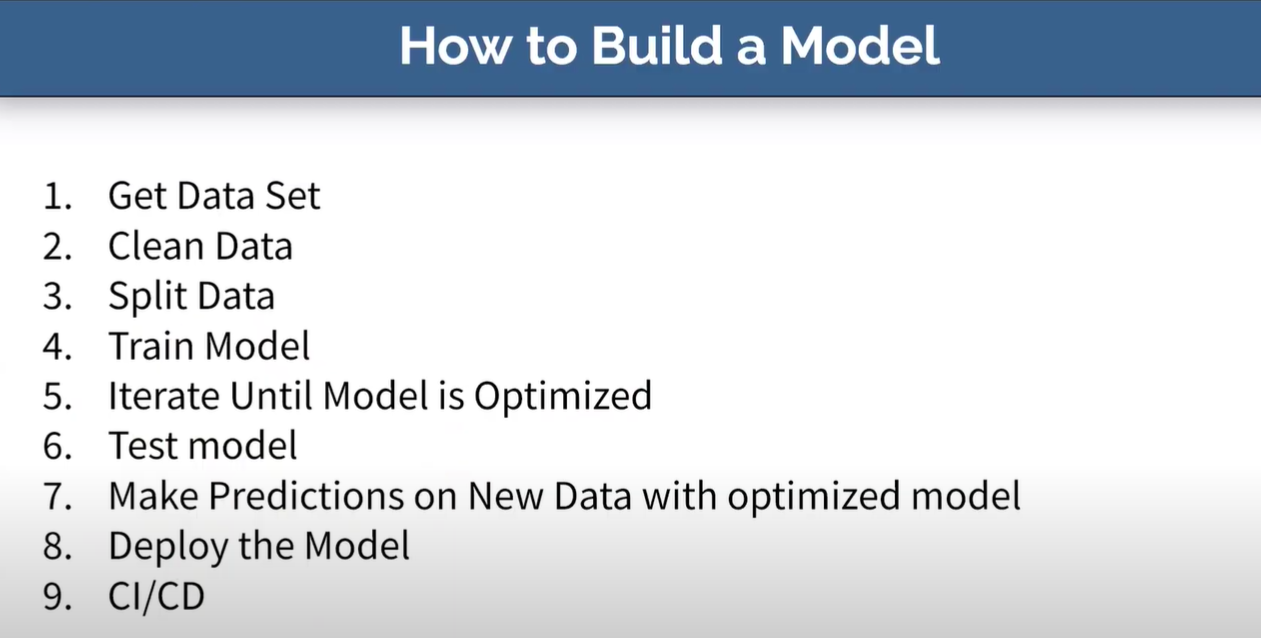

8. modeli bir web sitesine vs entegre etmek
9. modeli otomatik hale getirme yeni veriler geldikçe modelin kendini düzeltmesi

# Regression - geçmiş verilerden geleceği tahmin etme, rakam tahmin etme

In [4]:
#pip install xlrd #excel

In [5]:
import pandas as pd

In [7]:
df=pd.read_excel('cars.xls')

## eda- exploratory data analysis

In [24]:
df.head() #make marka demek

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [9]:
df.describe()

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [12]:
df.corr(numeric_only=True) #korelasyonu hesaplar. satırların birbiriyle olan poz neg ilişkisi
#price'la mileage yani km negatif bir ilişkiye sahip. km arttıkça fiyat azalır 

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

<Axes: >

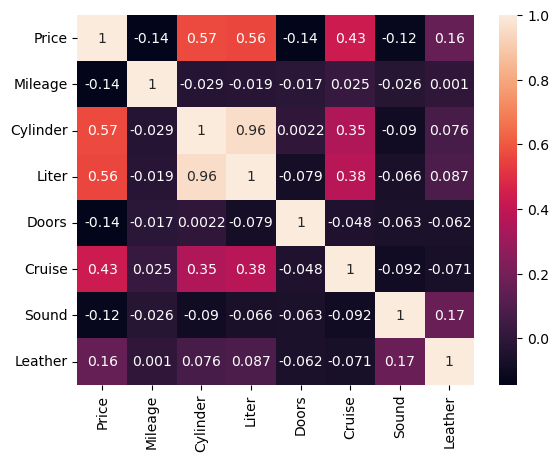

In [13]:
import seaborn as sns

sns.heatmap(df.corr(numeric_only=True), annot=True)

In [14]:
df['Make' ].unique() #tekil veriler

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

In [15]:
df ['Make' ].nunique() # kac tane tekil araba var

6

In [16]:
df [ 'Make' ].value_counts()

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

In [20]:
df [ 'Make' ].value_counts(normalize=True) #yüzdelik

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

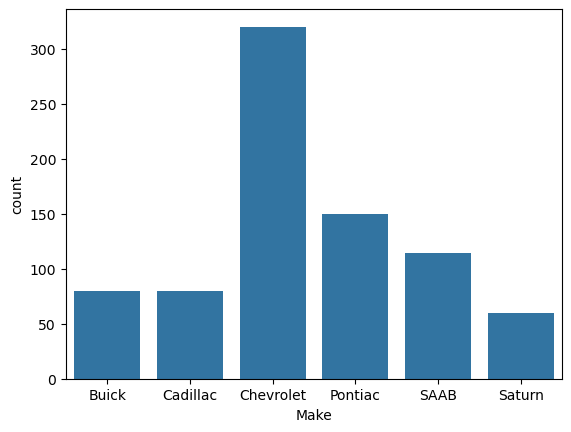

In [21]:
sns.countplot(x=df['Make']);

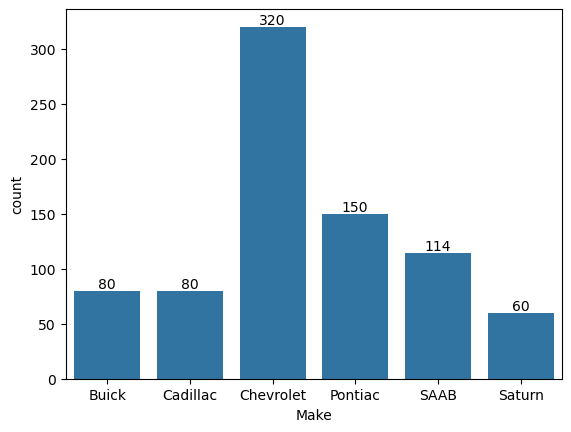

In [22]:
ax=sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

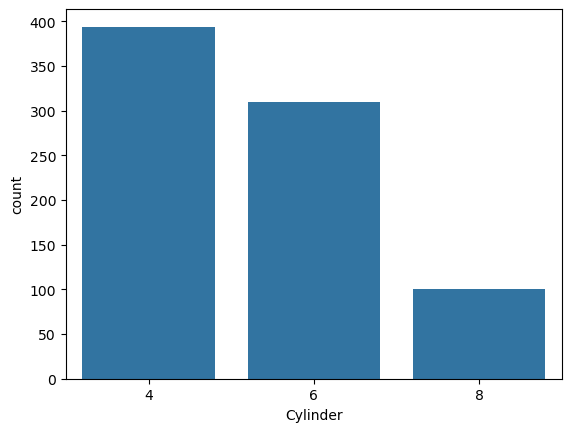

In [23]:
sns.countplot(x=df['Cylinder']);

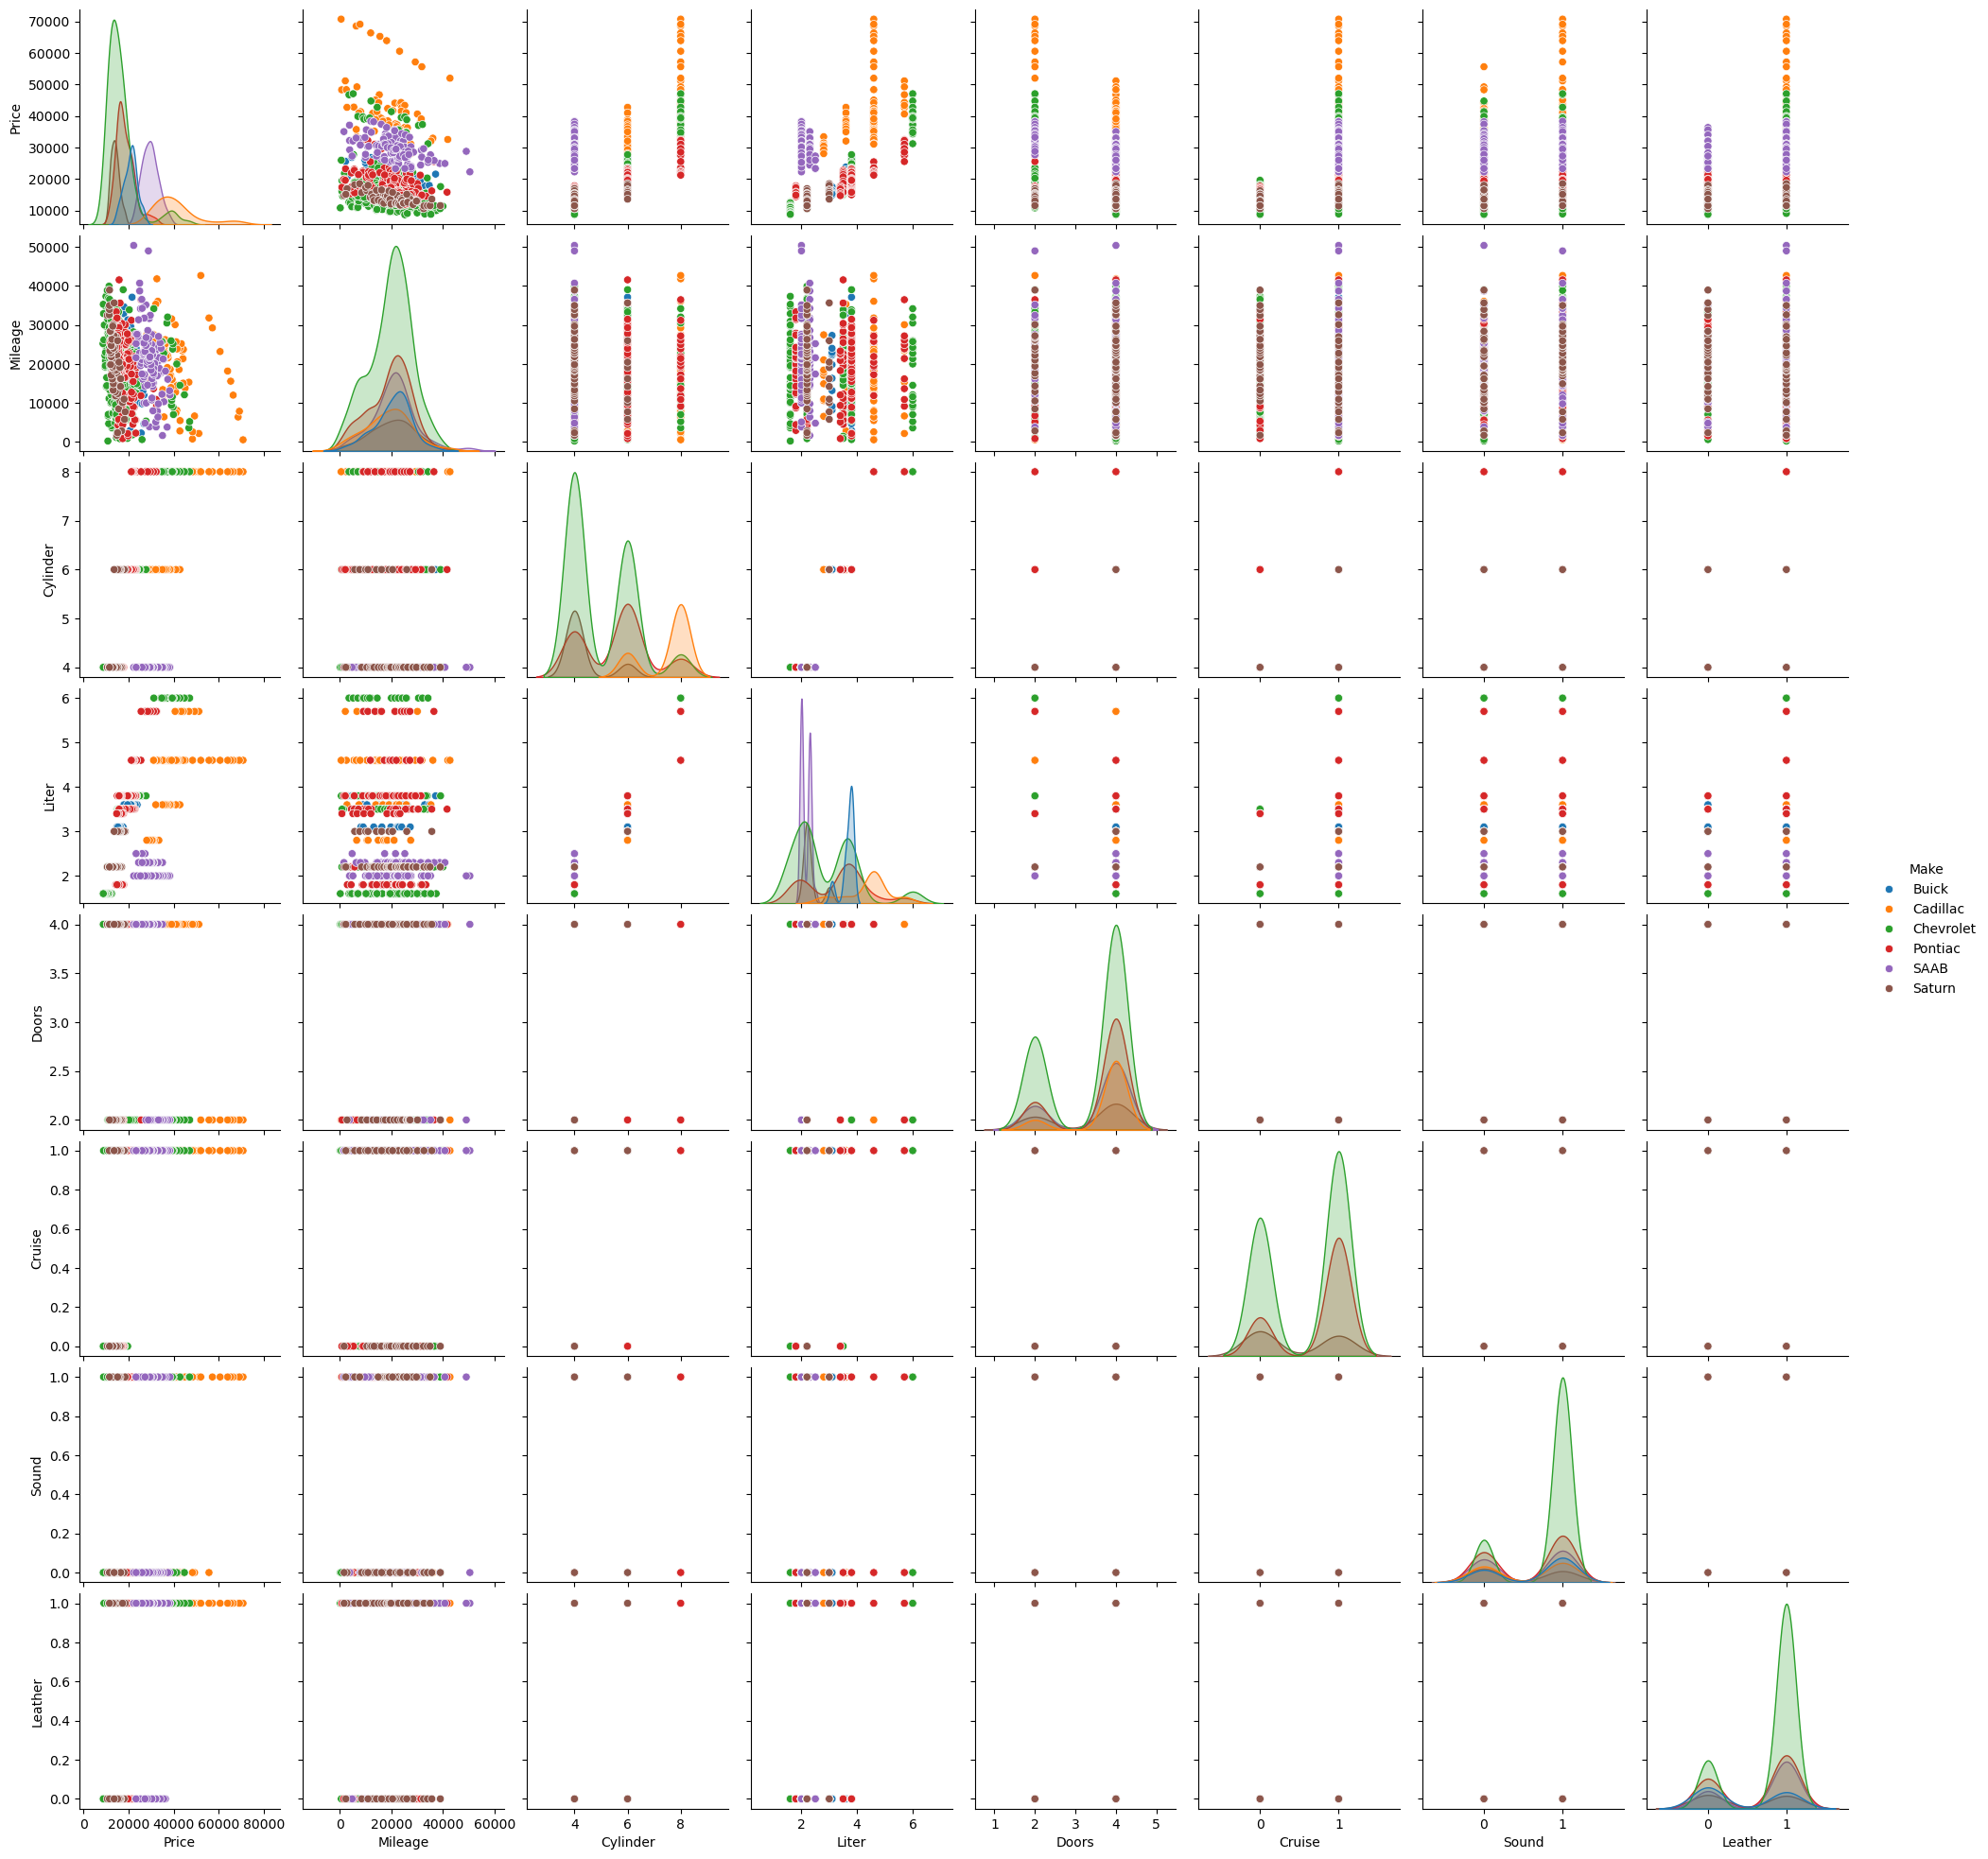

In [25]:
sns.pairplot(df,hue='Make');

<Axes: xlabel='Price', ylabel='Mileage'>

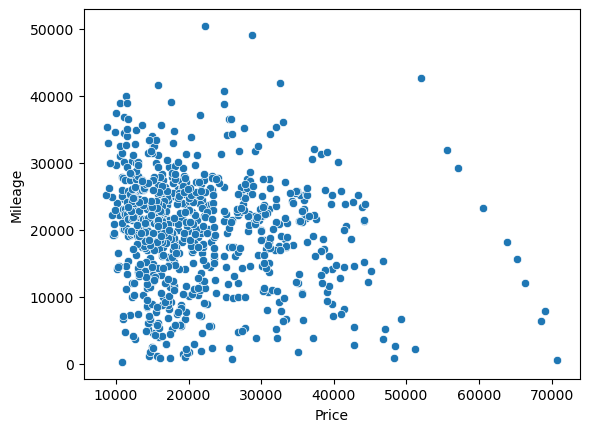

In [26]:
sns.scatterplot(x='Price',y='Mileage', data=df)

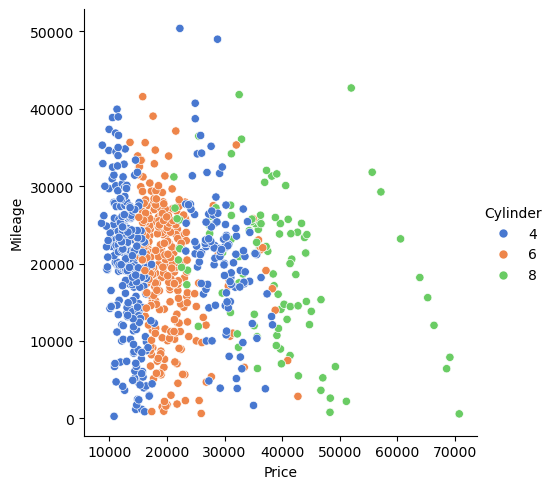

In [29]:
sns.relplot(x='Price',y='Mileage',hue='Cylinder', palette='muted',data= df)

### P - Degeri hesaplama

In [30]:
#Ho(sıfır hipotez)= arabanin fiyati ve uzerindeki km arasinda bir bag yok 
#Ha(alternatif hipotez)= arabanin fiyati ve uzerindeki km arasinda bir bag var
#p -degerine bakiyoruz eger p<0.05 H0 reddet Alternatifi kabul et

In [34]:
#p değeri ispat için kullanılır
from scipy.stats import ttest_ind
_,p=ttest_ind(df['Price'],df['Mileage'])
p #0.05den küçük old için arada bağ var

0.0008662338227446262

<Axes: xlabel='Price', ylabel='Count'>

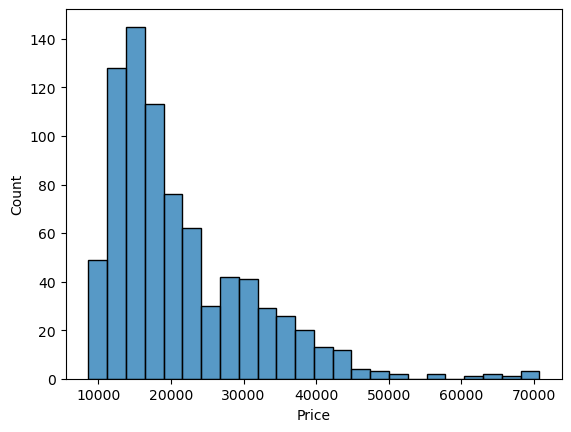

In [35]:
sns.histplot(x=df['Price'])

<Axes: xlabel='Price', ylabel='Count'>

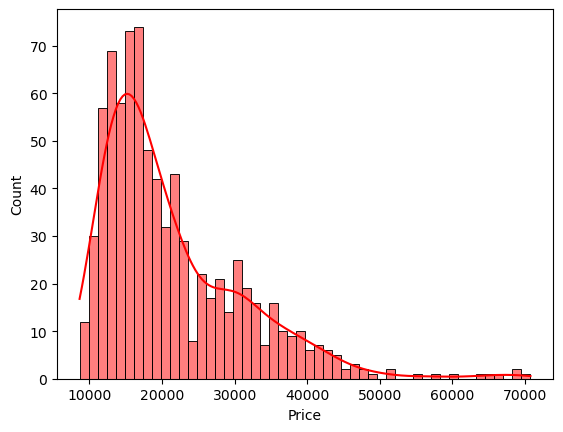

In [38]:
sns.histplot(x=df['Price' ],kde=True, color='red',bins=50)

<Axes: xlabel='Price', ylabel='Density'>

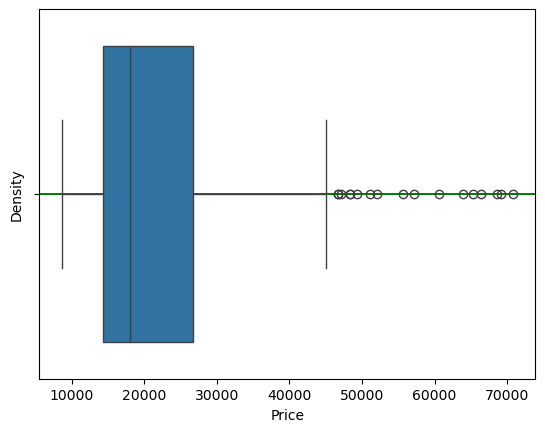

In [39]:
sns.kdeplot(x=df['Price'], fill=True, color='green')
sns.boxplot(x=df["Price"])

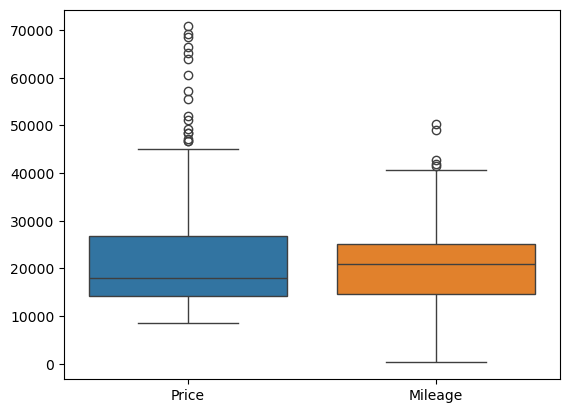

In [40]:
sns.boxplot([df["Price"],df['Mileage' ]]);

<Axes: xlabel='Make', ylabel='Price'>

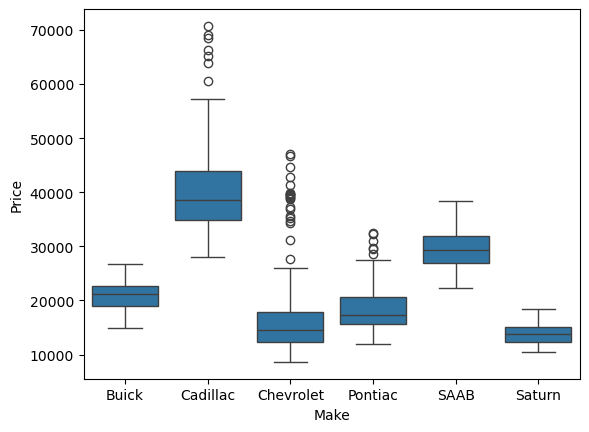

In [41]:
sns.boxplot(x='Make',y='Price', data=df)

<Axes: xlabel='Make', ylabel='Price'>

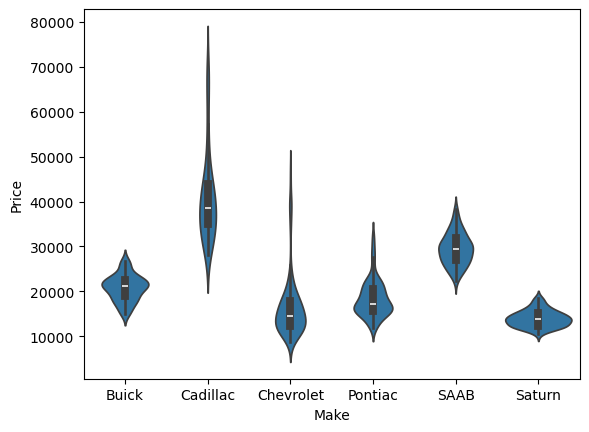

In [42]:
sns.violinplot(x='Make',y='Price', data=df)

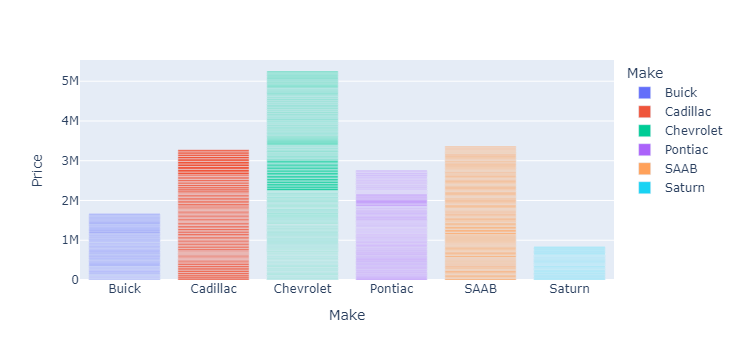

In [43]:
import plotly.express as px
px.bar(df,x='Make',y='Price', color='Make')

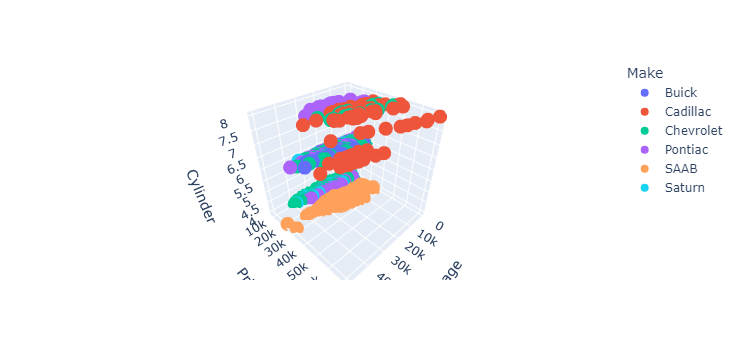

In [44]:
px.scatter_3d(df,x='Mileage',y='Price',z='Cylinder', color='Make')

#Data Science # MLOps Streamlit Gradio Flask

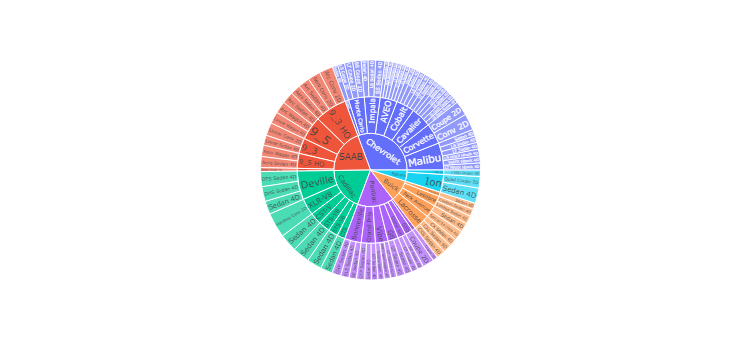

In [46]:
px.sunburst(df,path=['Make','Model', 'Trim' ], values='Price') #tıklayınca onun modelleri açılıyo grafikte :o

### Feature Engineering

In [47]:
df.corr(numeric_only=True) 

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

In [48]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [49]:
#corr yüzde 90la 20 arasindakileri alicaz. diğerlerinin katkısı az çünkü. 
#km nin katkısı ol bildiğim için onu da eklicem, 0.20den küçük olması elimizdeki verilerin az old kaynaklı
#en az 1000 veri gerekliydi 800 veri mi ne varmış

In [50]:
x=df[['Mileage','Cylinder','Liter','Cruise']]
y=df [ ['Price' ]]

In [51]:
from sklearn.model_selection import train_test_split

In [57]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
#test size 0.20 dedik, train size otomatik 0.8 oldu
#random state 42 de random sayı üretmeyi sabitliyor, modeli değiştirip tekrar çalıştırıldığında aynı satıları trainde aynı satırları testte kullanmak için ayırıyor

In [58]:
#filmin adı A Hitchhiker's Guide to the Number 42

In [59]:
x_train.shape

(643, 4)

In [60]:
643/804 #yani yaklaşık 0.8 train için ayrıldı

0.7997512437810945

In [61]:
x_train.shape, x_test.shape

((643, 4), (161, 4))

### Modelling

In [69]:
#Linear Regression
from sklearn. linear_model import LinearRegression

lr=LinearRegression()

In [64]:
model=lr.fit(x_train,y_train) #makine Ogrenmesi
tahmin=model.predict(x_test)

In [65]:
from sklearn.metrics import r2_score, mean_squared_error

In [71]:
mean_squared_error(y_test,tahmin)**0.5

7413.255792158802

In [72]:
r2_score(y_test, tahmin)

0.30711149069980004

In [73]:
#0.3 başarı oranı nedeni markayı dahil etmedik. corr da marka yok çünkü sayı değil

In [74]:
#label Encoding

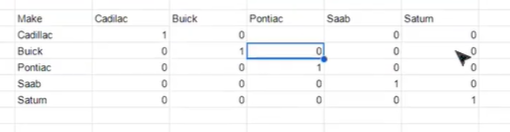

In [78]:
x=df [['Mileage','Cylinder','Liter','Cruise','Make','Trim' ]] #make model, trim bir alt model demek
y=df [ ['Price' ]]

In [79]:
x.head()

Mileage  Cylinder  Liter  Cruise   Make      Trim
0     8221         6    3.1       1  Buick  Sedan 4D
1     9135         6    3.1       1  Buick  Sedan 4D
2    13196         6    3.1       1  Buick  Sedan 4D
3    16342         6    3.1       1  Buick  Sedan 4D
4    19832         6    3.1       1  Buick  Sedan 4D

In [81]:
x=pd.get_dummies(x,drop_first=True) #label encoding #6 sütun 55 sütuna çıktı
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  ...  \
0         False      False        False              False  ...   
1         False      False        False              False  ...   
2         False      False        False              False  ...   
3         False      False        False              False  ...   
4         False      False        False              False  ...   

   Trim_Quad Coupe 2D  Trim_SE Sedan 4D  Trim_SLE Sedan 4D  Trim_SS Coupe 2D  \
0               False             False              False             False   
1               False             False              False             False   
2               False             False              False             False   
3               False             False              False             False   
4               False             False              False             False   

   Trim_SS Sedan 4D  Trim_SVM Hatchback 4D  Trim_SVM Sedan 4D  Trim_Sedan 4D  \
0             False                  False              False           True   
1             False                  False              False           True   
2             False                  False              False           True   
3             False                  False              False           True   
4             False                  False              False           True   

   Trim_Special Ed Ultra 4D  Trim_Sportwagon 4D  
0                     False               False  
1                     False               False  
2                     False               False  
3                     False               False  
4                     False               False  

[5 rows x 55 columns]

In [82]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [83]:
model=lr.fit(x_train,y_train) #makine Ogrenmesi
tahmin=model.predict(x_test)

In [88]:
mean_squared_error(y_test,tahmin)**0.5 #7bin dolar 1.5 dolara indi #HATA ya denir

1523.6314728711307

In [89]:
r2_score(y_test, tahmin) #başarı oranı 0.97 oldu

0.9707311770106378

In [92]:
# tabloda tüm sütunları görmek için bunu kodların yukarısına yazabilirsin parantez içindeki kadar sütun gözükür
# pd.set_option("display.max_columns",100)

In [93]:
from sklearn. linear_model import Ridge, Lasso, ElasticNet

In [94]:
R=Ridge() #hataları çok önemser
L=Lasso() #katsayılara focus olur
E=ElasticNet() #r ve l yi birlikte kullanır

In [95]:
Rmodel=R.fit(x_train,y_train)

In [96]:
tahmin2=Rmodel.predict(x_test)

In [113]:
mean_squared_error(y_test,tahmin2) **0.5 #root mean squared error

1575.6786242840142

In [99]:
r2_score(y_test,tahmin2)

0.9686973810318729

In [101]:
Lmodel=L.fit(x_train,y_train)

tahmin3=Lmodel.predict(x_test)

mean_squared_error(y_test,tahmin3) **0.5

1527.0430928302264

In [102]:
r2_score(y_test,tahmin3)

0.9705999564419019

In [103]:
Emodel=E.fit(x_train,y_train)

tahmin4=E.predict(x_test)

mean_squared_error(y_test,tahmin4) **.5

5916.121656152222

In [104]:
r2_score(y_test,tahmin4)

0.5587145785865181

In [110]:
#coefficients- katsayılar

In [105]:
lr.coef_ #coefficient yani hangi sütunu hangi sütunla çarptığına bakıyoruz

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [108]:
feature_importance=pd.DataFrame({'Feature':x_train.columns, 'Coefs':lr.coef_[0]})
feature_importance=feature_importance.sort_values(by='Coefs', ascending=False)

In [109]:
feature_importance

Feature         Coefs
28      Trim_Hardtop Conv 2D  16758.414214
4              Make_Cadillac  15536.446130
2                      Liter   7383.319566
12          Trim_Arc Conv 2D   7059.939896
7                  Make_SAAB   6851.000276
41       Trim_Linear Conv 2D   4528.670272
9          Trim_Aero Conv 2D   3905.882237
18              Trim_Conv 2D   3540.183141
14         Trim_Arc Wagon 4D    138.127365
0                    Mileage     -0.198809
3                     Cruise   -105.024563
13         Trim_Arc Sedan 4D   -222.310734
25        Trim_GT Sportwagon   -382.628105
11        Trim_Aero Wagon 4D  -1269.953605
54        Trim_Sportwagon 4D  -1453.737428
43      Trim_Linear Wagon 4D  -2104.339024
8                Make_Saturn  -2298.786085
42      Trim_Linear Sedan 4D  -2537.280862
1                   Cylinder  -2602.190533
10        Trim_Aero Sedan 4D  -2647.735267
5             Make_Chevrolet  -2816.880903
49          Trim_SS Sedan 4D  -3136.611254
6               Make_Pontiac  -3595.946075
27         Trim_GXP Sedan 4D  -3639.922969
37      Trim_LT Hatchback 4D  -3924.896395
31      Trim_LS Hatchback 4D  -4645.234857
48          Trim_SS Coupe 2D  -4780.239150
53  Trim_Special Ed Ultra 4D  -4875.643850
29        Trim_L300 Sedan 4D  -5323.272136
51         Trim_SVM Sedan 4D  -5515.189525
47         Trim_SLE Sedan 4D  -5535.163950
19             Trim_Coupe 2D  -5727.902260
26         Trim_GTP Sedan 4D  -5762.202280
45        Trim_Quad Coupe 2D  -6072.270492
39          Trim_LT Sedan 4D  -6174.809319
36          Trim_LT Coupe 2D  -6336.067587
24          Trim_GT Sedan 4D  -6539.242633
33          Trim_LS Sedan 4D  -6651.860202
46          Trim_SE Sedan 4D  -6652.639100
16         Trim_CXL Sedan 4D  -6796.073911
17         Trim_CXS Sedan 4D  -6854.377165
35    Trim_LS Sport Sedan 4D  -6870.406019
50     Trim_SVM Hatchback 4D  -6920.392799
38     Trim_LT MAXX Hback 4D  -7038.824171
32     Trim_LS MAXX Hback 4D  -7533.039792
22         Trim_DTS Sedan 4D  -7594.318973
34    Trim_LS Sport Coupe 2D  -7635.467926
52             Trim_Sedan 4D  -7770.244748
30          Trim_LS Coupe 2D  -7830.675291
44        Trim_MAXX Hback 4D  -7885.305685
15          Trim_CX Sedan 4D  -8043.909039
23          Trim_GT Coupe 2D  -8109.254993
40     Trim_Limited Sedan 4D  -8144.219762
21         Trim_DHS Sedan 4D  -8320.305567
20      Trim_Custom Sedan 4D -11197.943729

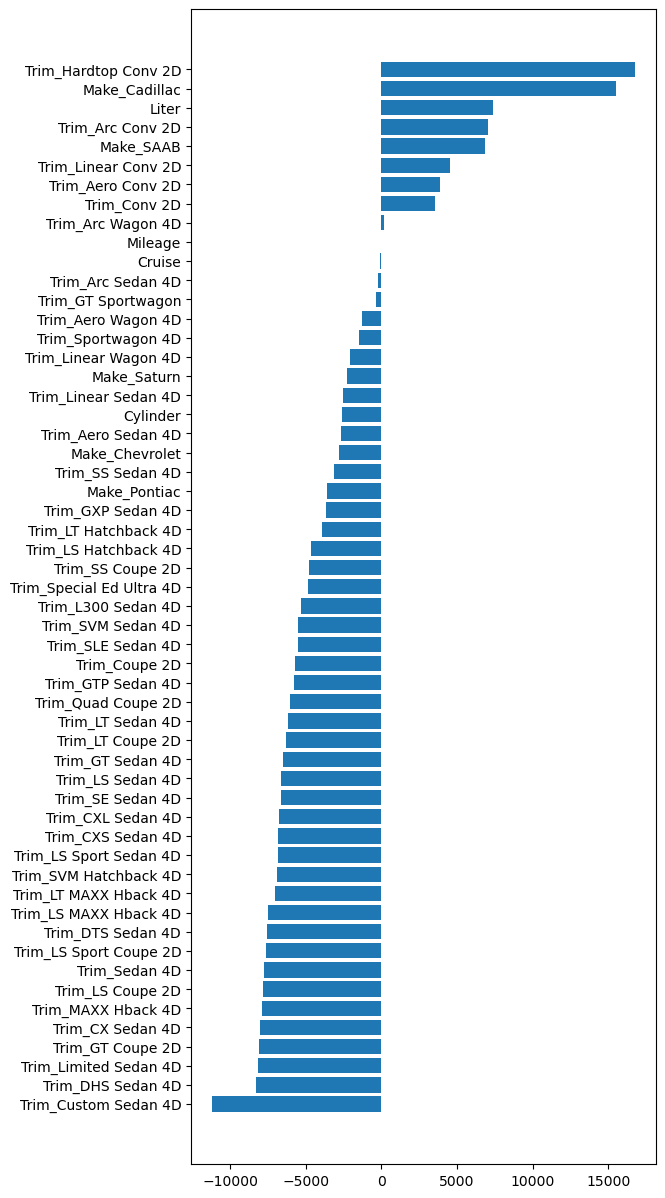

In [112]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,15))
plt.barh(feature_importance['Feature'], feature_importance['Coefs'])
plt.gca() .invert_yaxis()

In [115]:
residuals=y_test-tahmin
residuals

Price
192   559.667911
717  1027.528386
168  1144.233441
522  2909.433116
536   494.086073
..           ...
658  -812.069687
356  4025.396437
525  2361.161783
748  -961.806180
517  3242.062971

[161 rows x 1 columns]

<Axes: ylabel='Count'>

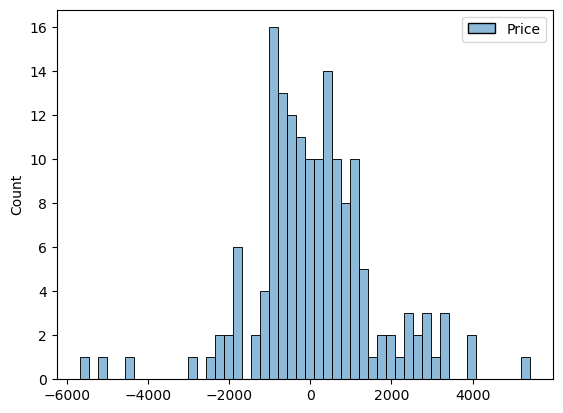

In [117]:
sns.histplot(residuals,bins=50)

<Axes: xlabel='Price', ylabel='Density'>

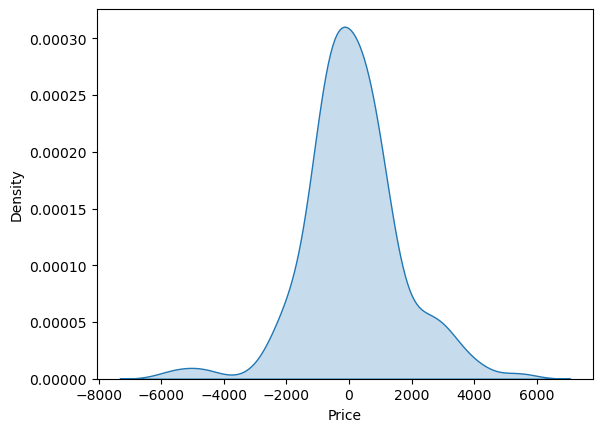

In [118]:
sns.kdeplot(x=residuals['Price'],fill=True)

normal distrubitiona benzemesi lazım grafiğin,
benziyor 
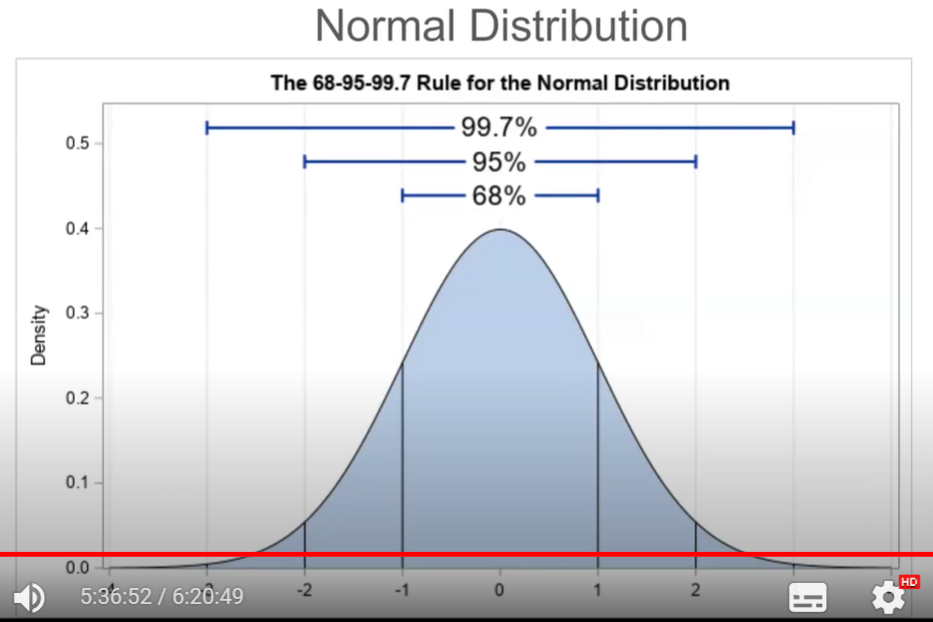

In [126]:
#decision tree
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

Dmodel=dt.fit(x_train,y_train)

tahmin5=dt.predict(x_test)

mean_squared_error(y_test,tahmin5) ** 0.5

1788.0251239009135

In [127]:
r2_score(y_test,tahmin5)

0.9596918726767666

In [130]:
#random forest, decision treenin bir alt dallarından biri
from sklearn. ensemble import ExtraTreesRegressor

ET=ExtraTreesRegressor()

ETModel=ET.fit(x_train,y_train)

C:\Users\karsa\anaconda3\envs\env\lib\site-packages\sklearn\base.py:1351: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [131]:
tahmin6=ET.predict(x_test)

In [132]:
mean_squared_error(y_test,tahmin6) ** 0.5

897.7640413481926

In [133]:
r2_score(y_test,tahmin6)

0.9898382197092123